# Introduction
How to open and understand the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Basic information
1. Hyperspectral data:
    1. `hsi_path` contains path to hyperspectral masked numpy arrays containing hyperspectral data that underwent masking (i.e., the field area is masked, whereas all irrelevant areas are not masked)
    2. The name of the file (e.g., _'1989.npz'_) refers to the index of the corresponding training sample in the ground-truth table.
2. Ground-truth data:
    1. `gt_path` contains path to ground truth .csv file.
    2. Additionally, `wavelength_path` contains the mapping between a band number and the corresponding wavelength.


In [2]:
hsi_path = 'D:/datasets/soilHyperspec/train_data/train_data/train_data/1500.npz'
gt_path = 'D:/datasets/soilHyperspec/train_data/train_data/train_gt.csv'
wavelength_path = 'D:/datasets/soilHyperspec/train_data/train_data/wavelengths.csv'

In [3]:
gt_df = pd.read_csv(gt_path)
wavelength_df = pd.read_csv(wavelength_path)

## Ground-truth description
`gt_df` contains:

1. `sample_index` - a reference to the numpay array containing the corresponding hyperspectral data.
2. P (for simplicity, we use P while referring to P_2O_5), K, Mg, pH - soil properties levels based on laboratory measurements.

In [4]:
gt_df[gt_df['sample_index']==150]

,sample_index,P,K,Mg,pH
150,150,140.0,312.0,216.0,7.4


## Displaying one hyperspectral band

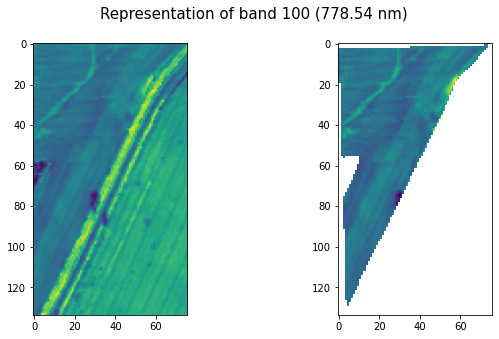

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
band_id = 100
wavelength = wavelength_df.loc[band_id-1]

with np.load(hsi_path) as npz:
    arr = np.ma.MaskedArray(**npz)

axs[0].imshow(arr[band_id,:,:].data)
axs[1].imshow(arr[band_id,:,:])

plt.suptitle(f'Representation of band {int(wavelength["band_no"])} ({wavelength["wavelength"]} nm)', fontsize=15)
plt.show()

## Displaying the aggregated spectral curve for a field

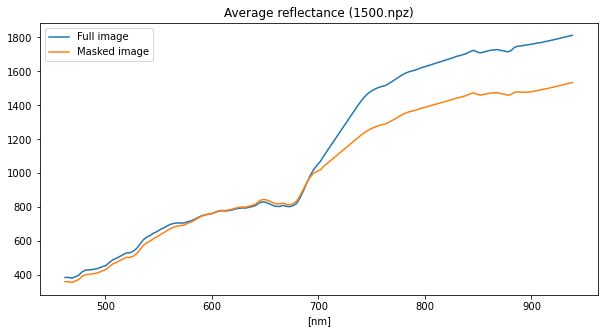

In [6]:
fig = plt.figure(figsize=(10, 5))

masked_scene_mean_spectral_reflectance = [arr[i,:,:].mean() for i in range(arr.shape[0])]
full_scene_mean_spectral_reflectance = [arr[i,:,:].data.mean() for i in range(arr.shape[0])]

plt.plot(wavelength_df['wavelength'], full_scene_mean_spectral_reflectance, label='Full image')
plt.plot(wavelength_df['wavelength'], masked_scene_mean_spectral_reflectance, label='Masked image')

plt.xlabel('[nm]')
plt.legend()
plt.title(f'Average reflectance ({hsi_path.split("/")[-1]})')
plt.show()

# Shapes and DS size

In [7]:
import os
trainSize = len(os.listdir('D:/datasets/soilHyperspec/train_data/train_data/train_data'))
print('Amount training images:',trainSize)                           

Amount training images: 1733


In [8]:
hsi_path = 'D:/datasets/soilHyperspec/train_data/train_data/train_data/1500.npz'

sizes = []
for file in os.listdir('D:/datasets/soilHyperspec/train_data/train_data/train_data'):
    if file == '.DS_Store':
        continue
    with np.load('D:/datasets/soilHyperspec/train_data/train_data/train_data/' + file) as npz:
        arr = np.ma.MaskedArray(**npz)
        sizes.append(arr.shape[1:3])

In [9]:
import sys
#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=False)
print(np.unique(sizes,axis=0))

[[ 11  11]
 [ 16  71]
 [ 17  93]
 ...
 [213 108]
 [217  68]
 [268  32]]


# Inspect bands - One Image

In [10]:
with np.load(hsi_path) as npz:
    arr = np.ma.MaskedArray(**npz)

print(arr.data.shape)

(150, 134, 76)


In [11]:
#may use for masked image
#cleanArr = np.delete(arr, np.where(arr == None))

In [12]:
newArr = np.transpose(arr.data.reshape(150, 10184))
newArrMasked = np.transpose(arr.reshape(150, 10184))

In [13]:
print(newArr[0][0:10])
print(newArr.shape)

[480 487 480 ... 546 548 550]
(10184, 150)


In [14]:
#For masked image - cut out masked vals

In [15]:
#Get means, histogram of values, range
#A row represents same pixel over different bands
#Columns represent different pixels over one band
#Should I normalise the pixel values?

In [97]:
import pandas as pd

#bands as list
bands = [i for i in range (1,151)]

def bandOverview(arr,summary = False):
    #Mean of each column (same pixel)
    means = arr.mean()
    print("Means calculated!")
    
    #maxs/mins
    ma = arr.max()
    print("Maxs calculated!")
    
    mi = arr.min()
    print("Mins calculated!")
    
    #range of each column
    ranges = ma-mi
    print("Ranges calculated!")
    
    #standard deviation
    stds = arr.std()
    print("Std. Dev. calculated!")
    
    #show first 10 and last 10 bands
    if summary == True:
        df = pd.DataFrame({"Band": bands[0:10]+['...']+bands[-10:],
                               "Mean": means[0:10]+['...']+means[-10:],
                               "Min": mi[0:10]+['...']+mi[-10:],
                               "Max": ma[0:10]+['...']+ma[-10:],
                               "Range": ranges[0:10]+['...']+ranges[-10:],
                               "std dev": stds[0:10]+['...']+stds[-10:]})
    else:
    #create full metrics
        df = pd.DataFrame({"Band": bands,
                           "Mean": means,
                           "Min": mi,
                           "Max": ma,
                           "Range": ranges,
                           "std dev": stds})
        
    print("Dataframe Created!\n")
        
    df = df.set_index('Band')

    return df, means, ma, mi, ranges, stds

In [34]:
df, means, ma, mi, ranges, stds = bandOverview(newArr, True)
dfM, meansM, maM, miM, rangesM, stdsM = bandOverview(newArrMasked, True)

353.28774803149605 1362.97568503937
Means calculated!
Maxs calculated!
Mins calculated!
Ranges calculated!
Std. Dev. calculated!
Dataframe Created!

357.66943447037704 1534.1353231597845
Means calculated!
Maxs calculated!
Mins calculated!
Ranges calculated!
Std. Dev. calculated!
Dataframe Created!



In [35]:
print('Full Image Stats')
display(df)
print('Masked Image Stats')
display(dfM)

Full Image Stats


,Mean,Min,Max,Range,std dev
Band,,,,,
1,356.030362,262,534,272,37.794352
2,356.702551,259,537,278,38.023631
3,353.287748,255,530,275,37.851862
4,361.42022,267,538,271,38.48149
5,371.683465,276,549,273,39.175408
6,390.843528,294,577,283,40.470537
7,402.62022,303,594,291,41.33561
8,405.044724,299,602,303,41.698001
9,408.999118,306,613,307,42.234152


Masked Image Stats


,Mean,Min,Max,Range,std dev
Band,,,,,
1,362.163824,117,779,662,51.476966
2,362.033438,121,785,664,51.821663
3,357.669434,122,785,663,51.774647
4,365.604354,132,798,666,52.664898
5,374.779399,139,819,680,53.666719
6,393.208707,151,858,707,55.506788
7,403.841562,151,877,726,56.834057
8,405.033887,151,884,733,57.489535
9,407.815081,149,894,745,58.323684


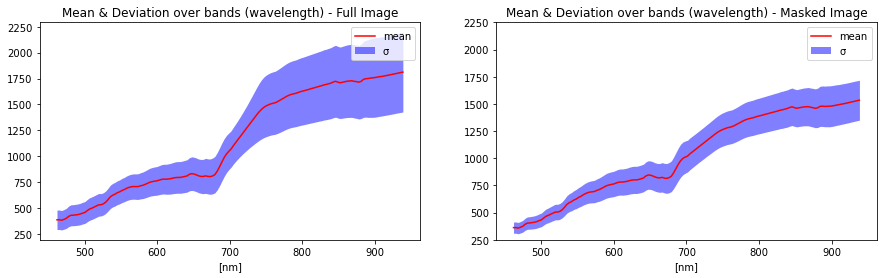

In [19]:
import matplotlib.pyplot as plt
def plotBands(means,stds,title):
    plt.title(title)

    plt.plot(wavelength_df['wavelength'],means, color='red')
    
    stdHigher = np.array(means) + np.array(stds)
    stdLower = np.array(means) - np.array(stds)
    plt.xlabel('[nm]')
    plt.fill_between(
        wavelength_df['wavelength'],
        stdHigher,
        stdLower,
        color='blue',
        alpha=0.5,
        linewidth=0,
        )
    plt.legend(['mean','\u03C3'])
    
plt.figure(figsize=(15,4))
plt.ylim(250,2250)
plt.subplot(1, 2, 1)
plotBands(means,stds,'Mean & Deviation over bands (wavelength) - Full Image')
plt.subplot(1, 2, 2)
plt.ylim(250,2250)
plotBands(meansM,stdsM,'Mean & Deviation over bands (wavelength) - Masked Image')

# Inspect bands - All Images

In [101]:
from tqdm.notebook import tqdm

#load in data, reshape and stack it
for i in tqdm(range(0,1732)): #range(0,1732,10) for every 10nth
    path = r"D:/datasets/soilHyperspec/train_data/train_data/train_data/" + str(i) + ".npz"
    with np.load(path) as npz:
        arr = np.ma.MaskedArray(**npz)
    
    # here, we keep all the pixels
    #print(arr.shape)
    reshapeRatio = (arr.shape[1])*(arr.shape[2])
    #print(reshapeRatio)
    newArr = arr.data.reshape(150, reshapeRatio).transpose()
    # print(newArr.shape)
    
    # here we just want the mask region
    newArrmasked = arr.reshape(150, reshapeRatio).transpose()
    # print(newArrmasked.shape)
    
    if i == 0:
        allIms = newArr
        allImsM = newArrmasked
    else:
        allIms = np.vstack((allIms,newArr))
        allImsM = np.ma.vstack((allImsM,newArrmasked))
    
allIms = pd.DataFrame(allIms)
allImsM = pd.DataFrame(allImsM).dropna()

  0%|          | 0/1732 [00:00<?, ?it/s]

In [88]:
df = pd.DataFrame(allImsM).dropna()
# print(df.shape, df.dropna().shape)

# mean = df.mean()
# sd = df.std()

# # plt.plot(mean)
# # plt.plot(mean + sd)
# # plt.plot(mean - sd)

df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
14,505.0,508.0,501.0,510.0,525.0,548.0,563.0,565.0,569.0,572.0,...,1634.0,1634.0,1637.0,1640.0,1644.0,1648.0,1651.0,1655.0,1659.0,1663.0
15,498.0,500.0,497.0,508.0,517.0,542.0,552.0,552.0,554.0,562.0,...,1650.0,1652.0,1655.0,1657.0,1659.0,1662.0,1665.0,1668.0,1671.0,1674.0
16,473.0,477.0,474.0,484.0,491.0,507.0,516.0,518.0,524.0,534.0,...,1645.0,1648.0,1651.0,1653.0,1655.0,1658.0,1661.0,1664.0,1667.0,1670.0
17,458.0,462.0,450.0,460.0,473.0,494.0,507.0,511.0,516.0,518.0,...,1574.0,1580.0,1583.0,1587.0,1590.0,1594.0,1598.0,1602.0,1606.0,1610.0
18,426.0,426.0,428.0,441.0,456.0,475.0,490.0,489.0,489.0,490.0,...,1526.0,1532.0,1535.0,1539.0,1543.0,1547.0,1551.0,1556.0,1560.0,1564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,369.0,361.0,362.0,370.0,385.0,405.0,408.0,401.0,391.0,393.0,...,2756.0,2760.0,2763.0,2766.0,2770.0,2774.0,2777.0,2780.0,2781.0,2782.0
158,382.0,377.0,368.0,378.0,376.0,389.0,397.0,393.0,396.0,399.0,...,2771.0,2769.0,2770.0,2773.0,2775.0,2778.0,2779.0,2781.0,2781.0,2780.0
159,359.0,365.0,363.0,367.0,371.0,383.0,393.0,392.0,388.0,387.0,...,2828.0,2833.0,2834.0,2835.0,2837.0,2839.0,2840.0,2840.0,2839.0,2838.0
160,378.0,371.0,359.0,366.0,374.0,391.0,395.0,394.0,392.0,391.0,...,2796.0,2797.0,2800.0,2803.0,2806.0,2810.0,2812.0,2814.0,2814.0,2814.0


In [21]:
#save as an npz

#few obs than features? - no solution via Singular value decomposition

In [102]:
import os
import pandas as pd
if os.path.exists('allFullImMetrics.csv'):
    print("Full Images CSV exists, loading metrics...")
    #load csv
    df = pd.read_csv('allFullImMetrics.csv')
    means = list(df['Mean'])
    ma = list(df['Max'])
    mi = list(df['Min'])
    ranges = list(df['Range'])
    stds = list(df['std dev'])
    print("Done!")
else:
    #create and save one
    df, means, ma, mi, ranges, stds = bandOverview(allIms, False)
    df.to_csv('allFullImMetrics.csv')
    
if os.path.exists('allMaskedImMetrics.csv'):
    print("Masked Images CSV exists, loading metrics...")
    #load csv
    dfM = pd.read_csv('allMaskedImMetrics.csv')
    meansM = list(dfM['Mean'])
    maM = list(dfM['Max'])
    miM = list(dfM['Min'])
    rangesM = list(dfM['Range'])
    stdsM = list(dfM['std dev'])
    print("Done!")
else:
    #create and save one
    dfM, meansM, maM, miM, rangesM, stdsM = bandOverview(allImsM, False)
    dfM.to_csv('allMaskedImMetrics.csv')

Means calculated!
Maxs calculated!
Mins calculated!
Ranges calculated!
Std. Dev. calculated!
Dataframe Created!

Means calculated!
Maxs calculated!
Mins calculated!
Ranges calculated!
Std. Dev. calculated!
Dataframe Created!



In [103]:
print('Full Images Stats')
display(df)
print('Masked Images Stats')
display(dfM)

Full Images Stats


,Mean,Min,Max,Range,std dev
Band,,,,,
1,336.891836,-3,5287,5290,94.906038
2,337.022892,-7,5275,5282,95.214766
3,332.980085,-13,5226,5239,94.920762
4,340.216051,-8,5263,5271,96.370885
5,349.166111,0,5298,5298,98.279280
...,...,...,...,...,...
146,1780.250935,13,7524,7511,947.785461
147,1782.537357,13,7499,7486,944.158784
148,1784.374951,12,7474,7462,940.102894


Masked Images Stats


,Mean,Min,Max,Range,std dev
Band,,,,,
1,336.650295,-1.0,2647.0,2648.0,84.199063
2,336.650611,-2.0,2635.0,2637.0,84.418168
3,332.502212,-3.0,2607.0,2610.0,84.078484
4,339.629670,-1.0,2629.0,2630.0,85.285896
5,348.458658,0.0,2649.0,2649.0,86.892861
...,...,...,...,...,...
146,1812.038603,47.0,5321.0,5274.0,992.861956
147,1813.940064,46.0,5301.0,5255.0,988.725343
148,1815.364382,46.0,5278.0,5232.0,984.114253


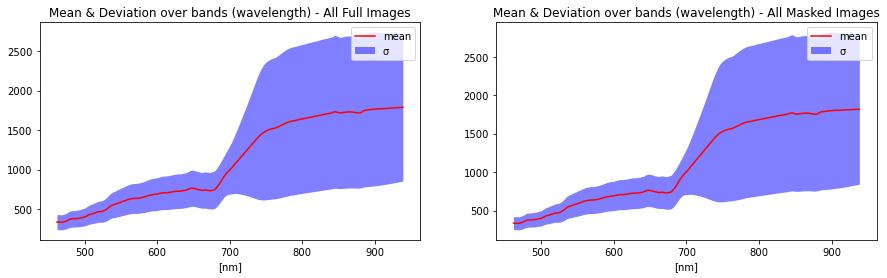

In [105]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
#plt.ylim(400,1750)
plotBands(means,stds,'Mean & Deviation over bands (wavelength) - All Full Images')
plt.subplot(1, 2, 2)
#plt.ylim(400,1750)
plotBands(meansM,stdsM,'Mean & Deviation over bands (wavelength) - All Masked Images')

In [106]:
#print means of middle values
dfM[70:110]

,Mean,Min,Max,Range,std dev
Band,,,,,
71,817.957921,21.0,2671.0,2650.0,227.586698
72,866.525398,23.0,2736.0,2713.0,231.730327
73,914.695134,27.0,2790.0,2763.0,240.391757
74,956.210405,28.0,2809.0,2781.0,256.980694
75,989.638789,28.0,2802.0,2774.0,281.805222
76,1019.853394,28.0,2789.0,2761.0,312.208694
77,1058.842965,29.0,2811.0,2782.0,346.491595
78,1095.085039,30.0,2820.0,2790.0,384.921625
79,1131.318019,31.0,2842.0,2811.0,425.784086


# Dimenstionality Reduction with PCA

In [107]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(allImsM)#fitting all masked images
fullImPca = PCA()
fullImPca.fit(allIms)
#save PCA as an object?
#PCA ran with all components kept
#svd solver randomized/full

PCA()

In [108]:
varRat = pca.explained_variance_ratio_
fullImVarRat = fullImPca.explained_variance_ratio_

(150,) (150,)


Text(0, 0.5, '% variance')

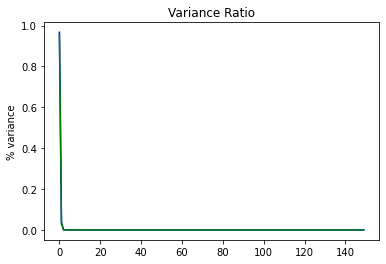

In [109]:
print(varRat.shape,fullImVarRat.shape)# why 121 not 150
#plot data variance ratio
plt.figure()
x = np.linspace(0,121)
plt.plot(varRat,'blue')
plt.title('Variance Ratio')
plt.plot(fullImVarRat,'green')

#why graph flat? - incorrect code?
plt.ylabel('% variance')

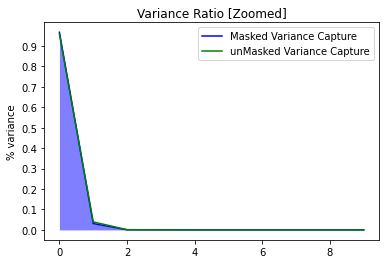

In [113]:
plt.figure()
plt.ylabel('% variance')
plt.title('Variance Ratio [Zoomed]')
plt.plot(varRat[:10],'blue')
plt.plot(fullImVarRat[:10],'green')
plt.yticks(np.arange(0, 1, 0.1))
x = np.arange(10)
plt.fill_between(
        x,
        varRat[:10],
        color='blue',
        alpha=0.5,
        linewidth=0,
        )
plt.legend(['Masked Variance Capture', 'unMasked Variance Capture'])

In [117]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(varRat)
print(fullImVarRat)

[0.967615 0.031085 0.000588 ... 0.000000 0.000000 0.000000]
[0.958668 0.039182 0.001087 ... 0.000000 0.000000 0.000000]


In [118]:
#transform
#masked
maskedRx = pca.transform(allImsM)
#fullIms
Rx = fullImPca.transform(allIms)

In [124]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

print(maskedRx[:,:2])

[[-821.513060 2773.799165]
 [-965.864482 2715.574305]
 [-1079.539123 2278.040900]
 ...
 [-3216.587051 1228.876548]
 [-3357.617657 1079.114530]
 [-3045.594819 1229.881697]]


In [125]:
#save transformed arrays (first 2 PCA transformed columns as they explain over 98% of variance)
from numpy import savetxt
savetxt('maskedRx.csv', maskedRx[:,:2], delimiter=',')
savetxt('Rx.csv', Rx[:,:2], delimiter=',')

In [128]:
print(Rx.shape)

(9783364, 150)


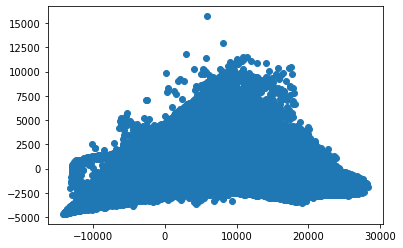

In [127]:
#scatter transformed data
plt.scatter(maskedRx[:,0],maskedRx[:,1])
#now create lists relating pixel values to an image (i.e. group by index)

In [34]:
#To Do:
#What n values to we keep from transformed values- (first 2 for 95% variance?)
#How to now plot pH values on image (features correspond to a whole image)
#Do we highlight areas of correlation?
#Next steps

# Miscellaneous Testing

In [35]:
#testing & debugging reshape
np.set_printoptions(threshold=sys.maxsize)
test1 = [[1,9,3],[1,8,3],[5,2,3]],[[1,2,2],[9,2,3],[1,2,4]]
test1 = np.array(test1)
print(test1.shape)
test2 = test1.reshape((2,9))
print(test2)

(2, 3, 3)
[[1 9 3 1 8 3 5 2 3]
 [1 2 2 9 2 3 1 2 4]]
